In [3]:
!git clone https://github.com/ProfessorAbraham/insurance-risk-analytics.git

fatal: destination path 'insurance-risk-analytics' already exists and is not an empty directory.


In [4]:
%cd insurance-risk-analytics

/content/insurance-risk-analytics


In [5]:
!mkdir -p data plots notebooks reports

In [6]:
!pip install gdown

In [7]:
!gdown --id  12oUCQ5KiKXZyzmT2OJjnK8vuygbXW1EZ -O MachineLearningRating_v3.txt

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=12oUCQ5KiKXZyzmT2OJjnK8vuygbXW1EZ
From (redirected): https://drive.google.com/uc?id=12oUCQ5KiKXZyzmT2OJjnK8vuygbXW1EZ&confirm=t&uuid=3227cd21-cd7e-49f4-98f0-641dc159ce11
To: /content/insurance-risk-analytics/MachineLearningRating_v3.txt
100% 529M/529M [00:08<00:00, 61.5MB/s]


In [40]:
import pandas as pd

# Load the dataset with pipe delimiter
df = pd.read_csv("data/MachineLearningRating_v3.txt", sep="|")

# Basic inspection
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


<ipython-input-40-4257782711>:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/MachineLearningRating_v3.txt", sep="|")


Shape: (1000098, 52)
Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [41]:
assert 'TotalClaims' in df.columns, "Missing column: TotalClaims"
assert 'TotalPremium' in df.columns, "Missing column: TotalPremium"
assert 'Province' in df.columns, "Missing column: Province"

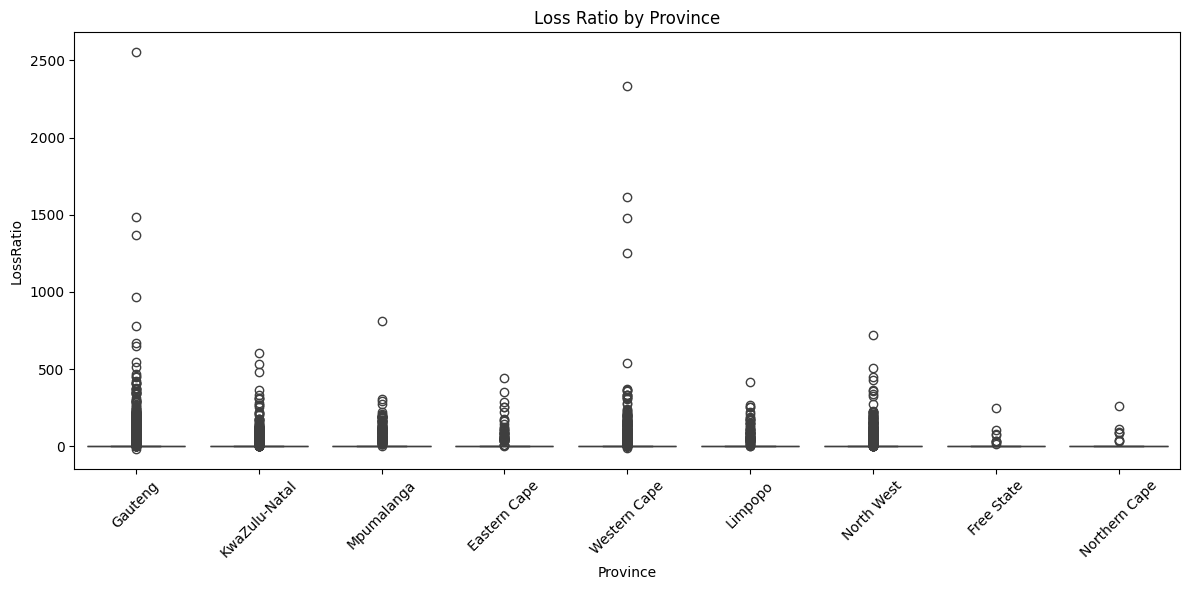

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute LossRatio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Plot LossRatio by Province
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("loss_ratio_province.png")


In [48]:
!git add .
!git commit -m "plot is saved"

[main 5292b6d] plot is saved
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename loss_ratio_province.png => plots/loss_ratio_province.png (100%)


In [49]:
!git push -u origin main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 321 bytes | 321.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ProfessorAbraham/insurance-risk-analytics.git
   e97f8f3..5292b6d  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [46]:
# Install DVC
!pip install dvc[s3]  # the [s3] adds support for storage options, optional

# Verify installation
!dvc --version


INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.8/438.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.5/458.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.8 MB/s 

In [51]:
!dvc init
!mkdir /content/insurance-risk-analytics/dvc_storage
!dvc remote add -d localstorage /content/insurance-risk-analytics/dvc_storage
!git add .dvc .gitignore
!git commit -m "Initialize DVC and add local remote"


Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>
Setting 'localstorage' as a default remote.
[main e4a93da] Initialize DVC and add local remote
 3 files changed, 10 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


In [52]:
!dvc add data/MachineLearningRating_v3.txt
!git add data/MachineLearningRating_v3.txt.dvc
!git commit -m "Track large dataset with DVC"


⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Adding data/MachineLearningRating_v3.txt to cache:   0% 0/1 [00:00<?, ?file/s]
  0% 0/1 [00:00<?, ?file/s{'info': ''}]                                       
100% 1/1 [00:08<00:00,  8.31s/file{'info': ''}]
                                               
  0% 0/1 [00:00<?, ?files/s]
  0% 0/1 [00:00<?, ?files/s{'info': ''}]
100% 1/1 [00:08<00:00,  8.27s/files{'info': ''}]
Adding...: 100% 1/1 [00:18<00:00, 18.45s/file{'info': ''}]

To track the changes with git, run:

	git add data/MachineLearningRating_v3.txt.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main 70fac48] Track large dataset with DVC
 1 file changed, 5 insertions(+)
 create mode 100644 data/MachineLearningRating_v3.txt.dvc


In [53]:
!dvc push


Pushing
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Pushing to local:   0% 0/1 [00:00<?, ?file/s]
Pushing to local:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
Pushing to local: 100% 1/1 [00:03<00:00,  3.52s/file{'info': ''}]
Pushing
1 file pushed


In [54]:
!git push origin main


Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (10/10), 1.15 KiB | 1.15 MiB/s, done.
Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To https://github.com/ProfessorAbraham/insurance-risk-analytics.git
   5292b6d..70fac48  main -> main
